In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme('paper')
import os
os.chdir(r'D:/Gyan Prakash Kushwaha/MLP/')

#### MetaData
- Airline:The name of the airline 
- Source: The source from which the service begins 
- Destination: The destination where the service ends 
- Route: Route the flight took. 
- Dep_Time: The time when the journey starts from the source. 
- Arrival_Time: Time of arrival at the destination. 
- Duration: Total duration of the flight. 
- Total_Stops: Total stops between the source and destination. 
- Additional_Info: Additional information about the flight 
- Price: The price of the ticket ▶▶▶ Target 
- Month: Month of journey. 
- WeekDay: Day at which journey started. 
- Day: Date of the start of journey.

In [137]:
df = pd.read_csv(r'Data/Preprocessing1.csv')

In [138]:
df.isnull().sum()

Airline              0
Source               0
Destination          0
Route                1
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops        200
Additional_Info      0
Price                0
Month                0
WeekDay              0
Day                236
dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9450 entries, 0 to 9449
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          9450 non-null   object 
 1   Source           9450 non-null   object 
 2   Destination      9450 non-null   object 
 3   Route            9449 non-null   object 
 4   Dep_Time         9450 non-null   object 
 5   Arrival_Time     9450 non-null   object 
 6   Duration         9450 non-null   object 
 7   Total_Stops      9250 non-null   object 
 8   Additional_Info  9450 non-null   object 
 9   Price            9450 non-null   int64  
 10  Month            9450 non-null   int64  
 11  WeekDay          9450 non-null   object 
 12  Day              9214 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 959.9+ KB


In [140]:
df.sample(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,WeekDay,Day
1728,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,14:05,19:50,5h 45m,1 stop,In-flight meal not included,10844,5,Thursday,9.0
9325,Jet Airways,Banglore,Delhi,BLR → DEL,07:10,10:10,3h,non-stop,No info,7229,4,Thursday,18.0
3653,SpiceJet,Banglore,Banglore,BLR → HYD → DEL,12:00,23:40,23h 10m,1 stop,No info,5822,5,Monday,6.0
2369,Air Asia,Kolkata,Banglore,CCU → BLR,22:50,01:20 02 Apr,2h 30m,non-stop,No info,4107,4,Monday,1.0
2420,Jet Airways,Delhi,Kolkata,DEL → BOM → COK,07:55,12:35 10 Jun,2h 20m,1 stop,No info,10577,5,Friday,24.0


#### Q-1) What is the average of the flight ticket price? Write your answer correct to two decimal places.

In [141]:
df['Price'].mean()

9027.895555555555

In [142]:
df.describe()

,Price,Month,Day
count,9450.000000,9450.000000,9214.000000
mean,9027.895556,4.718730,13.517582
std,4466.677471,1.162725,8.459792
min,1759.000000,3.000000,1.000000
25%,5198.000000,3.000000,6.000000
50%,8366.000000,5.000000,12.000000
75%,12373.000000,6.000000,21.000000
max,57209.000000,6.000000,27.000000


#### Q-2) During which month did the highest number of flights occur? Months are represented by numerical codes, with January corresponding to 1, February to 2, and so forth

In [143]:
df['Month'].value_counts().sort_values(ascending=False)

5    3092
6    3044
3    2388
4     926
Name: Month, dtype: int64

#### Q-3) Is the average price of flight tickets higher on weekends (Saturday and Sunday) or on weekdays (Remaining 5 days)?

In [144]:
df['WeekDay'].unique()

array(['Thursday', 'Sunday', 'Friday', 'Monday', 'Saturday', 'Wednesday',
       'Tuesday'], dtype=object)

In [145]:
obj = df.groupby('WeekDay')

In [146]:
# Weekdays
weekdays = obj['Price'].mean()[['Thursday', 'Friday', 'Monday', 'Wednesday','Tuesday']]
weekdays

WeekDay
Thursday     9013.744025
Friday       8961.014388
Monday       8834.710081
Wednesday    9091.326994
Tuesday      9275.404342
Name: Price, dtype: float64

In [205]:
sum(weekdays)/5

9035.239966232984

In [148]:
# Weekends
weekends = obj['Price'].mean()[['Sunday', 'Saturday']]

In [206]:
sum(weekends)/5

3631.6223540088527

#### Q-4) Two of the entries in the 'Additional_Info' column are 'No info' and 'No Info'. Replace all occurrences of 'No Info' with 'No info'. How many flights fall under airline 'IndiGo' and have 'No info' as additional information?

In [150]:
df.sample(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,WeekDay,Day
908,Air India,Delhi,Cochin,DEL → BOM → COK,07:00,19:15,12h 15m,1 stop,No info,9929,5,Monday,27.0
208,Jet Airways,Kolkata,Cochin,CCU → BOM → BLR,09:35,08:15 22 May,27h,1 stop,In-flight meal not included,8586,5,Tuesday,21.0
1173,Jet Airways,Kolkata,Cochin,CCU → DEL → BLR,09:40,22:05 10 Jun,18h 45m,1 stop,In-flight meal not included,12692,6,Saturday,15.0
7724,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:15,10:30,4h 15m,1 stop,No info,4226,4,Wednesday,3.0
15,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,7354,6,Wednesday,12.0


In [151]:
df['Additional_Info'].value_counts()

No info                         7375
In-flight meal not included     1750
No check-in baggage included     298
1 Long layover                    13
Change airports                    5
No Info                            3
2 Long layover                     3
1 Short layover                    2
Business class                     1
Name: Additional_Info, dtype: int64

In [152]:
df['Additional_Info'].replace('No Info','No info',inplace=True) # Sucessfully replaced the values.

In [153]:
df['Additional_Info'].value_counts()

No info                         7378
In-flight meal not included     1750
No check-in baggage included     298
1 Long layover                    13
Change airports                    5
2 Long layover                     3
1 Short layover                    2
Business class                     1
Name: Additional_Info, dtype: int64

In [154]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Month',
       'WeekDay', 'Day'],
      dtype='object')

In [155]:
df[(df['Airline'] == 'IndiGo') & (df['Additional_Info'] == 'No info')]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,WeekDay,Day
8,IndiGo,Mumbai,Hyderabad,BOM → HYD,19:05,20:35,1h 30m,non-stop,No info,2754,5,Monday,6.0
10,IndiGo,Delhi,Cochin,DEL → BOM → COK,09:00,01:30 10 May,10h,1 stop,No info,8854,6,Thursday,27.0
12,IndiGo,Delhi,Cochin,DEL → BOM → COK,17:30,01:30 16 May,8h,1 stop,No info,6979,5,Wednesday,15.0
18,IndiGo,Chennai,Banglore,MAA → CCU,16:40,14:00,7h 35m,non-stop,No info,3858,5,Monday,6.0
35,IndiGo,Banglore,Delhi,BLR → DEL,22:10,01:00 22 May,2h 50m,non-stop,No info,3625,5,Tuesday,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9425,IndiGo,Mumbai,Cochin,BOM → HYD,16:10,10:40,6h 10m,non-stop,No info,4575,3,Sunday,3.0
9427,IndiGo,Chennai,Kolkata,MAA → CCU,22:05,00:25 10 May,2h 20m,non-stop,No info,5277,5,Thursday,9.0
9429,IndiGo,Kolkata,Banglore,CCU → BLR,09:35,12:20,2h 45m,non-stop,No info,4462,3,Monday,18.0
9438,IndiGo,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943,5,Friday,3.0


#### Q-5) Convert the values of 'Duration' into seconds. Enter the average duration (in seconds) of a flight. Enter your answer correct to two decimal places.

- I have to change the data type in order to solve this problem.

In [156]:
df['Duration'] = df['Duration'].astype('datetime64[s]') # I'm Getting error Because I'm having the hours > 23.

ParserError: hour must be in 0..23: 26h 35m present at position 0

In [157]:
df['Duration'].sample(10)

2259     2h 40m
9010     8h 35m
4118    13h 55m
2197    28h 50m
962     12h 45m
7099     8h 40m
2267    14h 55m
8128    13h 30m
4220    12h 40m
3999     2h 15m
Name: Duration, dtype: object

In [158]:
# Stack Overflow
a = 'AJYF'
b = a.replace('AJ', '')
print(b)     # produces 'YF'
a = 'GTYF'
b = a.replace('GTY', '')
print(b)     # produces 'F'

YF
F


In [159]:
var = df['Duration'][1364]
print(var.split()[0][-1]) # I'm able to remove the h
print(var.split()[1][-1]) # able to remove 'm'
var.split()[0].replace('h','')

h
m


'16'

In [160]:
df['Duration'][1364]

'16h 15m'

In [161]:
df['Duration'][4739]

'3h'

In [162]:
var = df['Duration'][4739]
print(var.split()[0][-1]) # I'm able to remove the h
# print(var.split()[1][-1])
# in this case I have only 1 element in the list of my var variable and that is Hour.

h


##### I have to create a function for making the duration in seconds

In [163]:
def make_seconds(sample):
    total_seconds = 0
    var = sample.split()
    n = len(var)
    if var[0][-1] == 'h':
        hours = int(var[0].replace('h',''))
        total_seconds += (hours*60*60)

    if n == 2:
        if var[1][-1] == 'm':
            minutes = int(var[1].replace('m',''))
            total_seconds += minutes*60
    
    return total_seconds
            

In [164]:
print(make_seconds(df['Duration'][4739]))
print(make_seconds(df['Duration'][1364])) # working great.

10800
58500


In [165]:
# Now just check for null values.
df.isnull().sum() # Great🤩 I don't have null values also.

Airline              0
Source               0
Destination          0
Route                1
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops        200
Additional_Info      0
Price                0
Month                0
WeekDay              0
Day                236
dtype: int64

In [166]:
df['Duration'] = df['Duration'].apply(func=make_seconds) # converted the duration to seconds

In [167]:
df['Duration'].mean()

38957.90476190476

#### Transform the values in the 'dep_time' and 'arrival_time' columns to represent the hour component. For instance, if an entry is 10:05 June 13 or 10:05, the corresponding value should be 10. 
##### Then convert the time into four categories as follows:
- 5 <= hour < 12 = Morning 
- 12 <= hour < 17 = Afternoon 
- 17 <= hour < 20 = Evening 
- 20 <= hour < 5 = Night

In [168]:
df[['Dep_Time','Arrival_Time']].sample(6)

,Dep_Time,Arrival_Time
5523,06:10,10:55 16 May
3311,10:10,19:55
6494,07:10,10:05
1988,06:40,21:00
3092,11:30,19:15
5755,07:10,12:55


#### Here I again have to create a similar kinda function and convert the time to hours only.

In [169]:
print('Departure time')
print(int(df['Dep_Time'][139][:2]))
print(int(df['Dep_Time'][5190][:2]))
print(int(df['Dep_Time'][9272][:2]))

print('Arrival time')
print(int(df['Arrival_Time'][139][:2]))
print(int(df['Arrival_Time'][5190][:2]))
print(int(df['Arrival_Time'][9272][:2]))

# this is very easy just apply "lambda" Function

Departure time
10
13
13
Arrival time
9
4
12


#### Transformed the values into their correct format.

In [170]:
df['Dep_Time'] = df['Dep_Time'].apply(lambda x : int(x[:2]))
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : int(x[:2]))

In [134]:
df[['Dep_Time','Arrival_Time']].sample(6)

,Dep_Time,Arrival_Time
7811,11,14
7744,22,10
9387,11,17
6908,14,2
3703,22,0
8058,2,7


#### Now convert to `Moring`, `Afternoon`, `Evening`, `Night`
- 5 <= hour < 12 = Morning 
- 12 <= hour < 17 = Afternoon 
- 17 <= hour < 20 = Evening 
- 20 <= hour < 5 = Night

In [171]:
def convert(sample):
    if 5 <= sample < 12:
        return 'Moring'
    elif 12 <= sample < 17:
        return 'Afternoon'
    elif 17 <= sample < 20:
        return 'Evening'
    
    return 'Night'

In [172]:
df['Dep_Time'] = df['Dep_Time'].apply(convert)
df['Arrival_Time'] = df['Arrival_Time'].apply(convert)

In [175]:
df['Dep_Time'][7811] # The values are correct

'Moring'

In [177]:
len(df[(df['Dep_Time'] == 'Moring') & (df['Arrival_Time'] == 'Evening')]) # Answer.

922

### Q-7) What is the most frequent (mode) WeekDay?

#### Encode the values of column 'WeekDay' as follows:
- #### Weekends (Sunday, Saturday) = 1
- #### all remaining five days = 0

In [193]:
df['WeekDay'].sample(7)

4533     Thursday
4630     Saturday
4256      Tuesday
248      Thursday
5840    Wednesday
1858    Wednesday
6711       Monday
Name: WeekDay, dtype: object

In [195]:
df['WeekDay'].unique()

array(['Thursday', 'Sunday', 'Friday', 'Monday', 'Saturday', 'Wednesday',
       'Tuesday'], dtype=object)

In [196]:
def weekdays_convert(sample):
    if sample in ['Sunday', 'Saturday']:
        return 1
    
    return 0

In [197]:
df['WeekDay'] = df['WeekDay'].apply(weekdays_convert)

In [203]:
df['WeekDay'].sample(7)

1473    0
6739    1
2999    0
2195    0
5310    1
6539    1
9097    0
Name: WeekDay, dtype: int64

<AxesSubplot: ylabel='Frequency'>

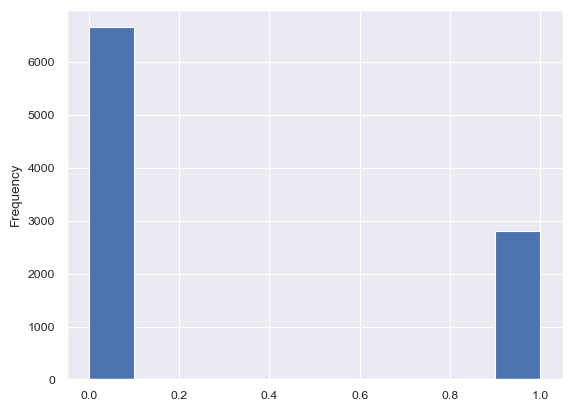

In [204]:
df['WeekDay'].plot(kind='hist')